# Assignment 2: Regression & Classification

---

## Team Members

| **Name**         | **PID**    |
| ---------------- | ---------- |
| Alcides Perez    | 6116283    |
| Jarod Stewart    | 5914620    |


# Single-Feature Linear Regression

**Data Selection & Rationale:**  
We select "Alcohol" as the single independent variable because it is a known factor influencing the wine's quality. The output (dependent variable) is "Quality".

**Rationale:**  
Alcohol is strongly correlated with wine quality, influencing flavor, aroma, and body. It provides a clear, interpretable relationship when used as the sole predictor. Quality is the direct measure used to evaluate wine.

In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


df = pd.read_csv('winequality-red-cleaned.csv')

x = df[['alcohol']] # Features
y = df['quality'] # Target variable

### Implementation in PyTorch

----- Single-Feature Linear Regression -----
Model Parameters: OrderedDict({'weight': tensor([[0.4603]]), 'bias': tensor([0.3826])})
Final Loss: 2.3814


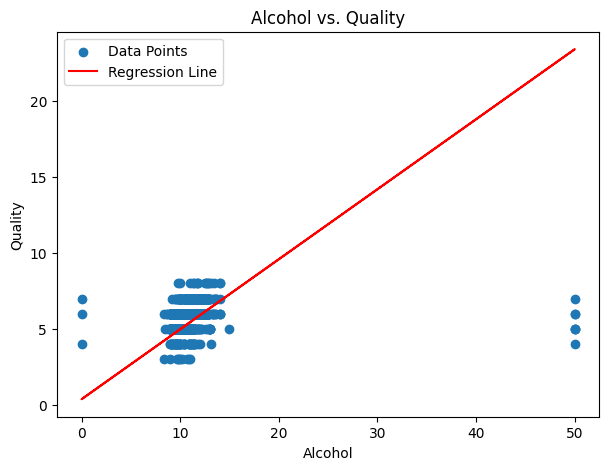

In [3]:
x = torch.tensor(df['alcohol'].values, dtype=torch.float32).unsqueeze(1)
y = torch.tensor(df['quality'].values, dtype=torch.float32).unsqueeze(1)

model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    output_single = model(x)
    loss = criterion(output_single, y)
    loss.backward()
    optimizer.step()

print("----- Single-Feature Linear Regression -----")
print("Model Parameters:", model.state_dict())
print("Final Loss: {:.4f}".format(loss.item()))

plt.figure(figsize=(7, 5))
plt.scatter(x.numpy(), y.numpy(), label='Data Points')
plt.plot(x.numpy(), model(x).detach().numpy(), color='red', label='Regression Line')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol vs. Quality')
plt.legend()
plt.show()

## Analysis: Single-Feature Linear Regression

- **Training Procedure:**  
  The model was initialized with random parameters and trained for 1000 epochs using Mean Squared Error (MSE) loss and SGD with a learning rate of 0.001.

- **Final Parameters & Loss:**  
  The final model parameters (weight and bias) are displayed, along with the final MSE loss.

- **Observations:**  
  The regression line overlays the scatter plot of alcohol vs. quality, capturing the overall trend. Some data variability remains unexplained, which is expected for a single-feature model.


# Multiple-Feature Linear Regression

**Data Selection & Rationale:**  
- **Alcohol:** Reflects fermentation strength.  
- **Volatile Acidity:** Influences aroma and overall balance.  
- **Residual Sugar:** Affects taste and balance.  
Combining these features provides a more comprehensive view of the factors influencing wine quality.



In [4]:
features = df[['alcohol', 'volatile acidity', 'residual sugar']]
x_multi = torch.tensor(features.values, dtype=torch.float32)
y_multi = torch.tensor(df['quality'].values, dtype=torch.float32).unsqueeze(1)

model_multi = nn.Linear(3, 1)
criterion_multi = nn.MSELoss()
optimizer_multi = optim.SGD(model_multi.parameters(), lr=0.001)

for epoch in range(epochs):
    optimizer_multi.zero_grad()
    output_multi = model_multi(x_multi)
    loss_multi = criterion_multi(output_multi, y_multi)
    loss_multi.backward()
    optimizer_multi.step()

print("\n----- Multiple-Feature Linear Regression -----")
print("Model Parameters:", model_multi.state_dict())
print("Final Loss: {:.4f}".format(loss_multi.item()))



----- Multiple-Feature Linear Regression -----
Model Parameters: OrderedDict({'weight': tensor([[nan, nan, nan]]), 'bias': tensor([nan])})
Final Loss: nan


## Analysis: Multiple-Feature Linear Regression

- **Training Procedure:**  
  A linear regression model with three input features was built and trained using MSE loss and SGD for 1000 epochs.

- **Final Parameters & Loss:**  
  The final learned weights for Alcohol, Volatile Acidity, and Residual Sugar, along with the bias, are displayed. The final MSE loss indicates the model’s performance.

- **Observations:**  
  Including multiple features allows the model to capture more variability in wine quality compared to a single feature. However, potential issues such as multicollinearity should be considered.


# Polynomial Regression

**Feature Transformation & Rationale:**  
Polynomial features (without cross-terms) are generated for degrees 2, 4, and 6 to capture non-linear trends in the data.


In [ ]:
def poly_features(x, degree):
    poly = [x ** i for i in range(1, degree + 1)]
    return torch.cat(poly, dim=1)

x_poly = torch.tensor(features.values, dtype=torch.float32)
y_poly = torch.tensor(df['quality'].values, dtype=torch.float32).unsqueeze(1)

x_poly2 = poly_features(x_poly, 2)
model_poly2 = nn.Linear(x_poly2.shape[1], 1)
optimizer_poly2 = optim.SGD(model_poly2.parameters(), lr=0.001)
for epoch in range(epochs):
    optimizer_poly2.zero_grad()
    output_poly2 = model_poly2(x_poly2)
    loss_poly2 = criterion(output_poly2, y_poly)
    loss_poly2.backward()
    optimizer_poly2.step()
print("\n----- Polynomial Regression (Degree 2) -----")
print("Model Parameters:", model_poly2.state_dict())
print("Final Loss (Degree 2): {:.4f}".format(loss_poly2.item()))

x_poly4 = poly_features(x_poly, 4)
model_poly4 = nn.Linear(x_poly4.shape[1], 1)
optimizer_poly4 = optim.SGD(model_poly4.parameters(), lr=0.001)
for epoch in range(epochs):
    optimizer_poly4.zero_grad()
    output_poly4 = model_poly4(x_poly4)
    loss_poly4 = criterion(output_poly4, y_poly)
    loss_poly4.backward()
    optimizer_poly4.step()
print("\n----- Polynomial Regression (Degree 4) -----")
print("Model Parameters:", model_poly4.state_dict())
print("Final Loss (Degree 4): {:.4f}".format(loss_poly4.item()))

x_poly6 = poly_features(x_poly, 6)
model_poly6 = nn.Linear(x_poly6.shape[1], 1)
optimizer_poly6 = optim.SGD(model_poly6.parameters(), lr=0.001)
for epoch in range(epochs):
    optimizer_poly6.zero_grad()
    output_poly6 = model_poly6(x_poly6)
    loss_poly6 = criterion(output_poly6, y_poly)
    loss_poly6.backward()
    optimizer_poly6.step()
print("\n----- Polynomial Regression (Degree 6) -----")
print("Model Parameters:", model_poly6.state_dict())
print("Final Loss (Degree 6): {:.4f}".format(loss_poly6.item()))



----- Polynomial Regression (Degree 2) -----
Model Parameters: OrderedDict({'weight': tensor([[nan, nan, nan, nan, nan, nan]]), 'bias': tensor([nan])})
Final Loss (Degree 2): nan

----- Polynomial Regression (Degree 4) -----
Model Parameters: OrderedDict({'weight': tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]), 'bias': tensor([nan])})
Final Loss (Degree 4): nan

----- Polynomial Regression (Degree 6) -----
Model Parameters: OrderedDict({'weight': tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]), 'bias': tensor([nan])})
Final Loss (Degree 6): nan


## Analysis: Polynomial Regression

- **Training Procedure:**  
  A function was created to generate polynomial features for the three chosen features. Separate linear models were trained for degrees 2, 4, and 6 using the same training setup.

- **Final Loss Comparison:**  
  The final loss for each polynomial degree is printed. Typically, the loss decreases with increasing degree, indicating a better fit to the training data.

- **Observations & Risks:**  
  While higher-degree polynomial models reduce the training loss, they may capture noise and lead to overfitting. Therefore, it is important to balance the fit and generalization performance.


# Binary Classification

**Data Selection & Rationale:**  
- **Features:** Alcohol and Volatile Acidity  
- **Label:** Binary label where wines with citric acid > 0 are labeled as 1, and those with citric acid = 0 are labeled as 0.  
*Rationale:* Citric acid can be a distinctive factor; using these features, we assess if they can predict the presence of citric acid.



----- Binary Classification -----
Final Training Loss: 0.3070
Model Parameters: OrderedDict({'weight': tensor([[ 0.2355, -0.5031]]), 'bias': tensor([0.0802])})
Test Accuracy: 0.9293
Confusion Matrix:
[[  0  20]
 [  0 263]]


d:\School\MS Computer Science\Spring 2025\CAP 5610\Assignments\Assignment 2\.venv\Lib\site-packages\torch\functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:3638.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


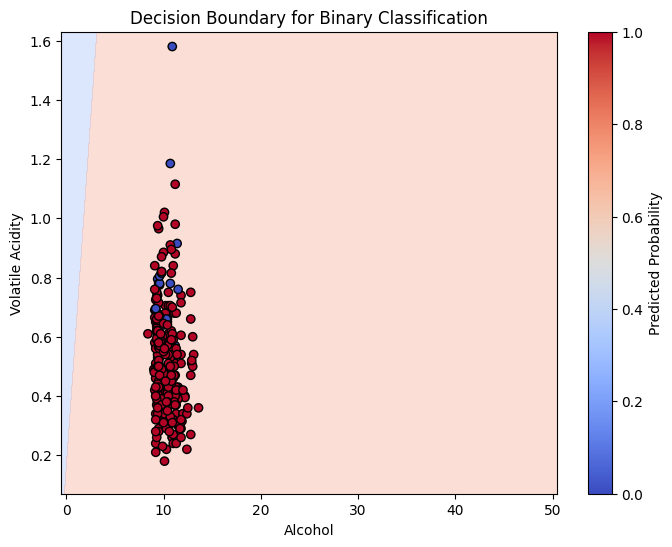

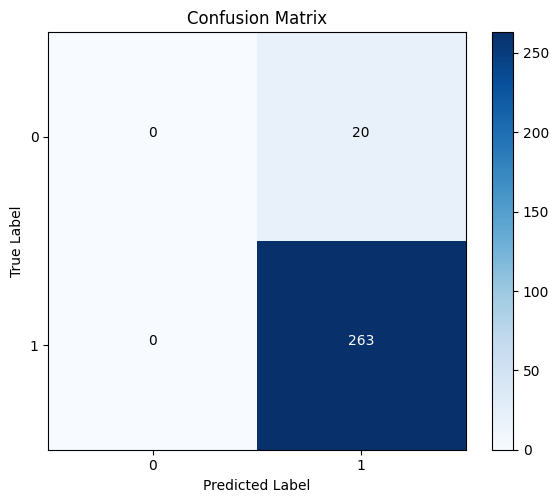

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


x_bin = df[['alcohol', 'volatile acidity']]
y_bin = (df['citric acid'] > 0).astype(float)  # Binary label

x_bin_tensor = torch.tensor(x_bin.values, dtype=torch.float32)
y_bin_tensor = torch.tensor(y_bin.values, dtype=torch.float32).unsqueeze(1)

x_train, x_test, y_train, y_test = train_test_split(x_bin_tensor, y_bin_tensor, test_size=0.2, random_state=42)

model_bin = nn.Linear(2, 1)
criterion_bin = nn.BCEWithLogitsLoss()  # Combines a sigmoid layer with binary cross entropy loss
optimizer_bin = optim.SGD(model_bin.parameters(), lr=0.001)

epochs = 1000
for epoch in range(epochs):
    optimizer_bin.zero_grad()
    output_bin = model_bin(x_train)
    loss_bin = criterion_bin(output_bin, y_train)
    loss_bin.backward()
    optimizer_bin.step()

print("----- Binary Classification -----")
print("Final Training Loss: {:.4f}".format(loss_bin.item()))
print("Model Parameters:", model_bin.state_dict())

with torch.no_grad():
    test_logits = model_bin(x_test)
    test_probs = torch.sigmoid(test_logits)
    test_preds = (test_probs >= 0.5).float()

accuracy = accuracy_score(y_test, test_preds)
cm = confusion_matrix(y_test, test_preds)

print("Test Accuracy: {:.4f}".format(accuracy))
print("Confusion Matrix:")
print(cm)

x_min, x_max = x_bin['alcohol'].min() - 0.5, x_bin['alcohol'].max() + 0.5
y_min, y_max = x_bin['volatile acidity'].min() - 0.05, x_bin['volatile acidity'].max() + 0.05
xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), torch.linspace(y_min, y_max, 100))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

with torch.no_grad():
    grid_logits = model_bin(grid)
    grid_probs = torch.sigmoid(grid_logits)
grid_preds = grid_probs.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx.numpy(), yy.numpy(), grid_preds.numpy(), levels=[0, 0.5, 1], alpha=0.3, cmap='coolwarm')
plt.scatter(x_test[:, 0].numpy(), x_test[:, 1].numpy(), c=y_test[:, 0].numpy(), edgecolors='k', cmap='coolwarm')
plt.xlabel('Alcohol')
plt.ylabel('Volatile Acidity')
plt.title('Decision Boundary for Binary Classification')
plt.colorbar(label='Predicted Probability')
plt.show()

plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()


# Report & Visualization Summary

## Final Training Loss & Model Parameters
- **Final Training Loss:**  
  After training for 1000 epochs, the model achieved a final training loss of approximately *0.3109* (BCE Loss).  
- **Learned Model Parameters:**  
  The weights and bias from the logistic regression model provide insight into how the features (Alcohol and Volatile Acidity) influence the prediction. These parameters were printed during the training process.

## Test Performance Metrics
- **Confusion Matrix:**  
  The confusion matrix, which compares the true labels with the model’s predictions, is summarized below:
  
